In [1]:
%matplotlib inline
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('BTCE-USDBTC.csv')

df.head(5)

,Date,High,Low,Average,Last,Buy,Sell,Volume,Volume (Currency)
0,2017-05-24,2460.000,2213.000,2336.5000,2360.000,2359.999,2359.244,2.743935e+07,11713.37874
1,2017-05-23,2249.119,2017.890,2133.5045,2218.000,2218.988,2218.000,2.419629e+07,11107.58537
2,2017-05-22,2227.000,2003.794,2115.3970,2027.442,2027.442,2027.170,3.155922e+07,14713.58743
3,2017-05-21,2075.862,1960.000,2017.9310,2008.871,2014.600,2009.002,1.559647e+07,7731.77154
4,2017-05-20,1998.774,1895.670,1947.2220,1996.029,1996.042,1995.580,1.127478e+07,5760.39916


In [3]:
df['Date'] = pd.DatetimeIndex(df['Date'])
df.dtypes

Date                 datetime64[ns]
High                        float64
Low                         float64
Average                     float64
Last                        float64
Buy                         float64
Sell                        float64
Volume                      float64
Volume (Currency)           float64
dtype: object

In [4]:
df2 = df.rename(columns={'Date':'ds', 'Low': 'y'})
df2.head()

,ds,High,y,Average,Last,Buy,Sell,Volume,Volume (Currency)
0,2017-05-24,2460.000,2213.000,2336.5000,2360.000,2359.999,2359.244,2.743935e+07,11713.37874
1,2017-05-23,2249.119,2017.890,2133.5045,2218.000,2218.988,2218.000,2.419629e+07,11107.58537
2,2017-05-22,2227.000,2003.794,2115.3970,2027.442,2027.442,2027.170,3.155922e+07,14713.58743
3,2017-05-21,2075.862,1960.000,2017.9310,2008.871,2014.600,2009.002,1.559647e+07,7731.77154
4,2017-05-20,1998.774,1895.670,1947.2220,1996.029,1996.042,1995.580,1.127478e+07,5760.39916


In [5]:
df2 = df2[['ds','y']]

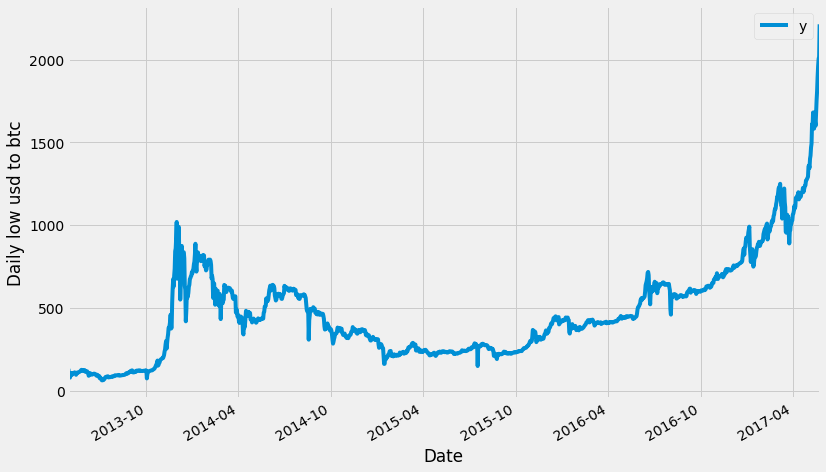

In [6]:
ax = df2.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Daily low usd to btc')
ax.set_xlabel('Date')

plt.show()

In [7]:
my_model = Prophet(interval_width=0.95)
my_model.fit(df2)

In [8]:
future_dates = my_model.make_future_dataframe(periods=365, freq='D')
future_dates.tail()

,ds
1821,2018-05-20
1822,2018-05-21
1823,2018-05-22
1824,2018-05-23
1825,2018-05-24


In [9]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2018-05-20,2671.267408,1053.281953,4349.392021
1822,2018-05-21,2679.788622,1047.900036,4422.180641
1823,2018-05-22,2688.020709,1069.117809,4387.496763
1824,2018-05-23,2693.320352,1011.478409,4438.320064
1825,2018-05-24,2694.563357,1077.981638,4393.926901


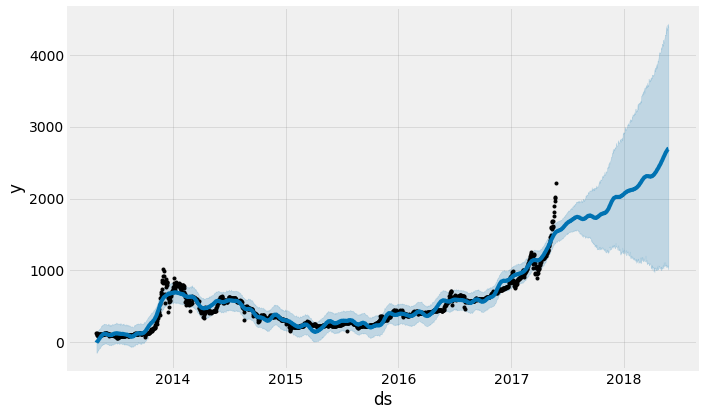

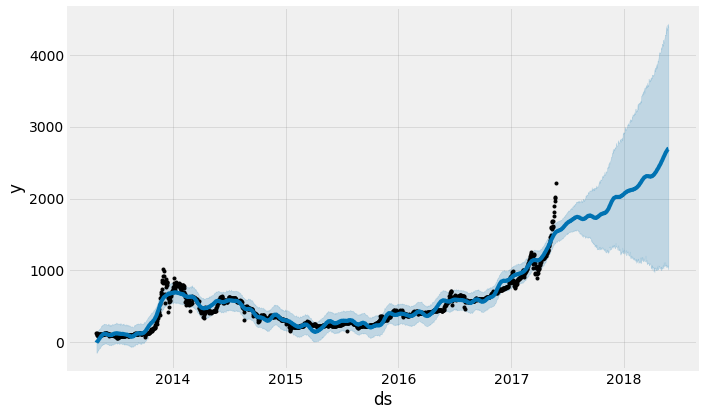

In [10]:
my_model.plot(forecast,
              uncertainty=True)

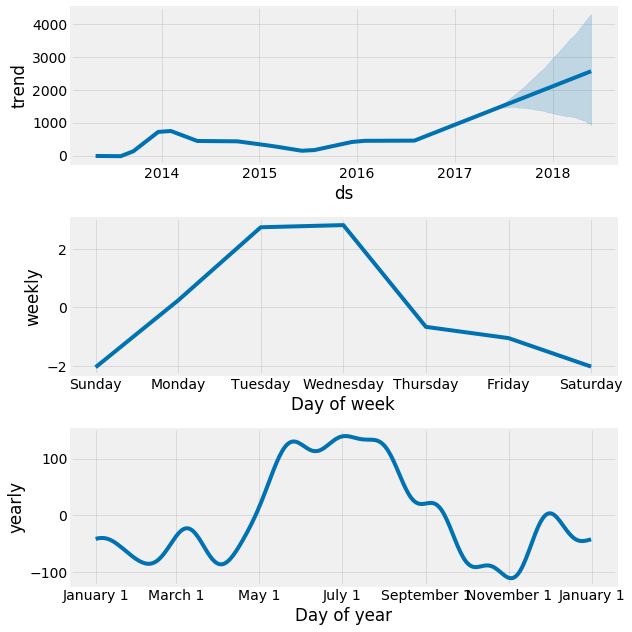

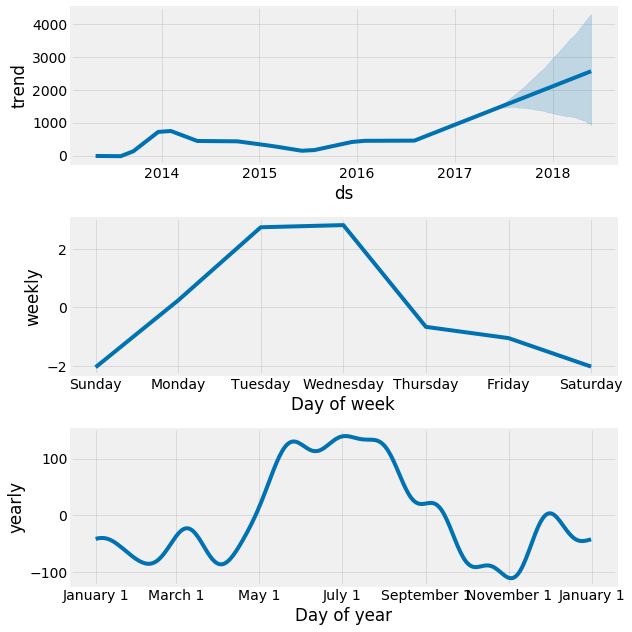

In [11]:
my_model.plot_components(forecast)